[Шаг 1. Загрузка данных и подготовка к анализу](#section1)

[Шаг 2. Анализ данных](#section2)
* [Cоотношение видов общественного питания по их количеству](#section2_1)
* [Cоотношение сетевых и несетевых заведений по количеству](#section2_2)
* [Вид общественного питания для которого характерно сетевое распространение](#section2_3)
* [Характеристика сетевых заведений](#section2_4)
* [Среднее количество посадочных мест](#section2_5)
* [Топ - 10 улиц по количеству объектов](#section2_6)
* [Улицы с одним объектом общественного питания](#section2_7)
* [Распределение количества посадочных мест](#section2_8)

[Общие выводы](#section2_9)



<a id='section1'></a>
## Шаг 1. Загрузка данных и подготовка к анализу

Загрузим данные с объектами общественного питания. Так же нам понадобится датафрейм с адресами в Москве.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
streets = pd.read_csv('https://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
df = pd.read_csv('/datasets/rest_data.csv')
streets.columns = ['street', 'areaid','okrug', 'area']

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Приведем все названия к одному регистру для чистоты данных 

In [4]:
df['object_name'] = df['object_name'].str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


<a id='section2'></a>
## Шаг 2. Анализ данных

<a id='section2_1'></a>
### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.


Выделим объекты общественного питания группировкой и найдем их количество. Отсортируем по убыванию и построим график 

In [6]:
count_object_type = df.groupby('object_type').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).reset_index()

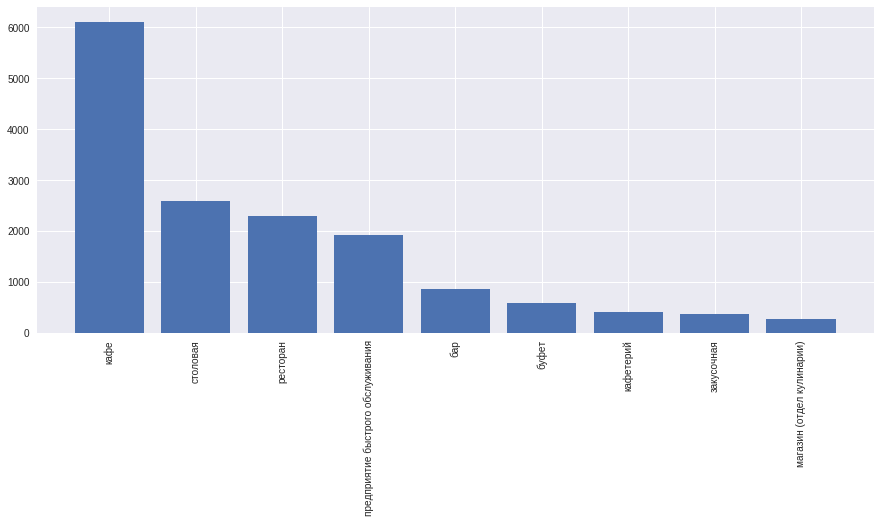

In [7]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,6))
    plt.bar(count_object_type['object_type'],count_object_type['id'])
    plt.xticks(rotation=90) 
    plt.show()

Как видно из графика, в Москве преобладает кафе, как вид общественного питания. 

<a id='section2_2'></a>
### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Выделим две группы - сетевых и несетевых заведений, посчитаем их количество и построим график. 

In [8]:
count_object_chain = df.groupby('chain').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).reset_index()

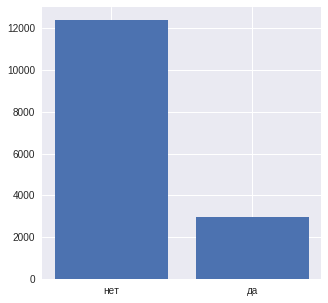

In [9]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,5))
    plt.bar(count_object_chain['chain'],count_object_chain['id'])
    plt.show()

Несетевых заведений гораздо больше в Москве.

<a id='section2_3'></a>
### Для какого вида объекта общественного питания характерно сетевое распространение?

Определим для  какого вида объекта общественного питания характерно сетевое распространение. Найдем число объектов для сетевего распространения. Объеденим две таблицы: в одной - общее число объектов, в другой - число объектов сетевого распространения. Найдем соотношение между сетевыми и несетевыми объектами.

In [10]:
chain_yes=df.groupby(['object_type','chain']).agg({'id': 'count'}).reset_index().query('chain == "да"')
chain_yes.columns = ['object_type','chain','chain_yes_count']
chain_yes = chain_yes.drop('chain', 1)
chain_yes_all = count_object_type.merge(chain_yes, on = 'object_type' )
chain_yes_all.columns = ['object_type','object_count','chain_yes_count']
chain_yes_all['ratio %'] = chain_yes_all['chain_yes_count'] / chain_yes_all['object_count'] * 100
chain_yes_all.sort_values(by = 'ratio %', ascending = False)

,object_type,object_count,chain_yes_count,ratio %
3,предприятие быстрого обслуживания,1923,791,41.133645
8,магазин (отдел кулинарии),273,78,28.571429
2,ресторан,2285,544,23.807440
0,кафе,6099,1396,22.888998
7,закусочная,360,56,15.555556
6,кафетерий,398,52,13.065327
4,бар,856,37,4.322430
5,буфет,585,11,1.880342
1,столовая,2587,3,0.115964


Из таблицы делаем вывод, что для предприятий быстрого обслуживания характерно сетевое распространение. Затем идут отделы кулинарии, скорее всего, это крупные продуктовые магазины, которых достаточно много в Москве и в них имеются отделы собственной кулинарии. 

<a id='section2_4'></a>
### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Выделим сетевые заведения, затем сгруппируем данные по заведениям и найдем среднее количество посадочных мест, и количество заведений. Затем методом jointplot объеденим два графика на одном. 

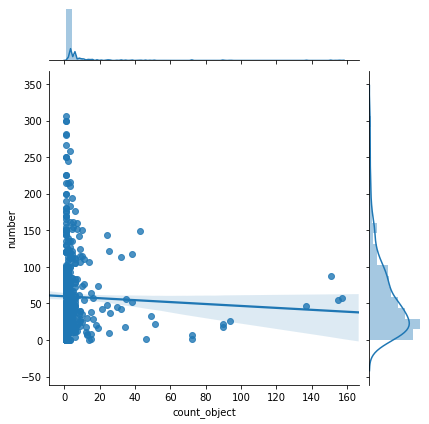

In [11]:
chain_object =  df.query('chain == "да"')
chain_group =  chain_object.groupby('object_name').agg({'id': 'count', 'number' : 'mean'}).sort_values(by = 'id', ascending = False)
chain_group.columns = ['count_object','number']
sns.jointplot(x="count_object", y="number", data=chain_group, kind='reg')
plt.show()

На графике видим, что у сетевых заведений, как правило, небольшое число посадочных мест. Основная масса заведений имеют 50 посадочных мест. 

<a id='section2_5'></a>
### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Найдем среднее количество посадочных мест в каждом типе заведений. 

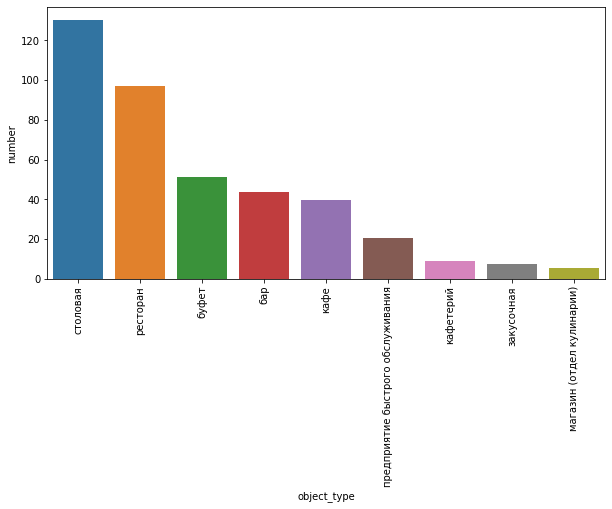

In [12]:
mean_number_object_type = df.groupby('object_type').agg({'number': 'mean'}).reset_index()
mean_number_object_type = mean_number_object_type.sort_values(by = 'number', ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x="object_type", y="number", data= mean_number_object_type)
plt.xticks(rotation=90) 
plt.show()

По результатм графика самое большое число посадочных мест имеют столовые, самое низкое - в отделах кулинарии. 

### Выделите в отдельный столбец информацию об улице из столбца address .

В столбце с адресами улицы разделены запятыми с двух сторон. Выделим из адреса толькой улицу.

In [13]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [14]:
df['street'] = df['address'].apply(lambda x: x.split(',')[1])
df["street"] = df["street"].map(str.strip)

<a id='section2_6'></a>
### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Сгруппируем данные по улицам и рассчитаем количество объектов общественного питания на каждой улице. Уберем из данных город Зеленоград и поселение Сосенское, т.к. это отдельные населенные пункты, которые являются частью Москвы. Затем отсортируем улицы по возрастанию и найдем топ-10 улиц по количеству объектов общественного питания. Построим график. 

In [15]:
street_count_object_type = df.groupby('street').agg({'id': 'count'}).reset_index()
street_count_object_type_top10 =  street_count_object_type.sort_values(by = 'id', ascending = False).reset_index()
street_count_object_type_top10["street"] = street_count_object_type_top10["street"].map(str.strip) 
street_count_object_type_top10 = street_count_object_type_top10[street_count_object_type_top10['street'] != 'город Зеленоград' ]
street_count_object_type_top10 = street_count_object_type_top10[street_count_object_type_top10['street'] != 'поселение Сосенское']
street_count_object_type_top10 = street_count_object_type_top10.head(10)

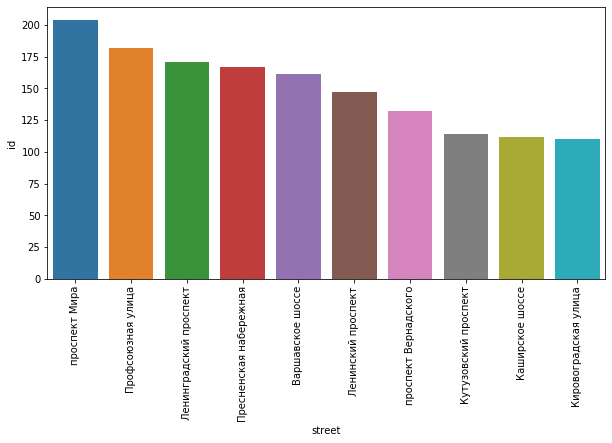

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x="street", y="id", data= street_count_object_type_top10)
plt.xticks(rotation=90) 
plt.show()

По графику видно, что наибольшее количество объектов находятся на проспекте Мира, Профсоюзной улице и Ленинградском проспекте. Это неудивительно, поскольку эти улицы одни из самых больших в Москве. Остальные улицы несильно отстают и, как правило, это проспекты и шоссе, которые имеют большую протяженность в Москве.  

Воспользуемся внешними данными и возьмем датафрейм с улицами и округами. Объеденим два датафрейма.

In [17]:
street_count_object_area =  street_count_object_type_top10.merge(streets,on='street',how = 'left')
street_count_object_area = street_count_object_area.drop(['id','index','areaid'],1)
street_count_object_area.drop_duplicates().head(15)

,street,okrug,area
0,проспект Мира,СВАО,Алексеевский район
1,проспект Мира,СВАО,Ярославский Район
2,проспект Мира,СВАО,Район Марьина роща
3,проспект Мира,СВАО,Останкинский район
4,проспект Мира,СВАО,Район Ростокино
5,проспект Мира,СВАО,Район Свиблово
6,проспект Мира,ЦАО,Мещанский район
7,Профсоюзная улица,ЮЗАО,Академический район
8,Профсоюзная улица,ЮЗАО,Район Черемушки
9,Профсоюзная улица,ЮЗАО,Район Ясенево


Из таблицы видим, что большие улицы Москвы находятся сразу в нескольких районах города. 

<a id='section2_7'></a>
### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Выделим среди улиц те, на которых находится по одному объекту питания. Затем объеденим два датафрейма. 

In [18]:
street_one_object = street_count_object_type[street_count_object_type['id'] == 1].reset_index()
street_one_object = street_one_object.drop('index',1)
street_one_object = street_one_object.drop('id',1)
street_one_object["street"] = street_one_object["street"].map(str.strip)
street_and_area =  street_one_object.merge(streets,on='street',how = 'left')
street_and_area.head()

,street,areaid,okrug,area
0,1-й Балтийский переулок,54.0,САО,Район Аэропорт
1,1-й Басманный переулок,13.0,ЦАО,Басманный район
2,1-й Басманный переулок,15.0,ЦАО,Красносельский район
3,1-й Ботанический проезд,82.0,СВАО,Район Свиблово
4,1-й Вешняковский проезд,120.0,ЮВАО,Рязанский район


In [19]:
street_one_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
street    579 non-null object
dtypes: object(1)
memory usage: 4.6+ KB


Из данных можно сделать вывод, что в Москве около 579 улиц с одним объектом общественного питания.

Удалим дубликаты в столбце с районами и получим список районов, где есть улицы с одним объектом общественного питания.

In [20]:
area_nunique = street_and_area['area'].drop_duplicates()
len(area_nunique)

100

In [21]:
area_nunique.head(10)

0           Район Аэропорт
1          Басманный район
2     Красносельский район
3           Район Свиблово
4          Рязанский район
5           Район Якиманка
6          Район Хамовники
7     Район Соколиная Гора
8        Даниловский район
11         Мещанский район
Name: area, dtype: object

Мы получили сто районов в Москве где есть улицы с одним объектом питания. Из этого можно сделать вывод о том, что в Москве огромное количество улиц. Среди них маленькие улицы протяженостью около 200 метров. Улицы такого размера есть в многих районах Москвы. На этих улицах может находиться один объект общественого питания. Получается мы получили порядка 579 улиц, которые расположены в 100 районах, где находится один объект общественого питания.

<a id='section2_8'></a>
### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Выделим список топ-10 улиц. Затем получим срез данных из основного датафрейма и построим гистограмму распределения посадочных мест.

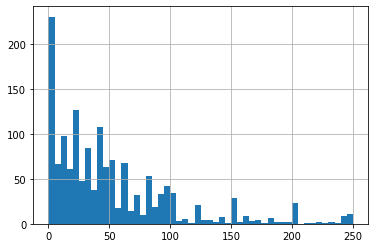

In [22]:
top_10_street = street_count_object_type_top10['street']
object_top_10 = df.query('street in @top_10_street')
object_top_10['number'].hist(bins = 50, range = (0, 250))
plt.show()

Как видно из гистораммы, в улицах, где большое количество объектов общественного питания преобладают заведения без посадочных мест.

<a id='section2_9'></a>
## Общие выводы

По результатам анализа объектов общественного питания можно сделать следующие выводы:
1. В Москве преобладает кафе, как вид общественного питания. 
2. Несетевых заведений гораздо больше, чем сетевых. 
3. В сетевых заведениях небольшое количество посадочных мест, но в Москве их много.
4. В столовых и ресторанах самое большое число посадочных мест.
5. На проспекте Мира, Профсоюзной улице и Ленинградском проспекте больше всего заведений общественного питания. 
6. На улицах, где много объектов общественного питания, преобладают заведения без посадочных мест. 

Я бы порекомендовал открыть заведение типа кафе с количеством посадочных мест порядка 50-60 на Преснеской набережной. Эта рекомендация обоснована тем, что кафе крайне популярны в  Москве, плюс уникальность у нас офицанты-роботы, которые не устают и способны оперативно обслуживать 20-25 столов. Все это место будет находиться на Пресненской набережной рядом с экспо-центром, там постоянно большое количество людей на разных конференциях и выставках. Туда приходят разные люди и всех постоянно будет удивлять кафе с роботами. 